<a id=section1></a>

### 1. Problem Statement

<a id=section1></a>

<a id=section2></a>

### 2. Data Description

In [1]:
import numpy as np                                            # Implemennts milti-dimensional array and matrices
import pandas as pd                                           # For data manipulation and analysis
#import pandas_profiling
import matplotlib.pyplot as plt                               # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                         # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline                                           
# Allow plots to appear directly in the notebook

import math 
from collections import Counter 
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing dataset using pd.read_csv
agt = pd.read_csv('D://DataBase//Telecom_Capstone//gender_age_train.csv')
events = pd.read_csv('D://DataBase//Telecom_Capstone//events_data.csv')
brand = pd.read_csv('D://DataBase//Telecom_Capstone//phone_brand_device_model.csv')

In [3]:
agt.head()                                                  #Gives the first five rows of gender_age_train

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [4]:
agt.shape

(74645, 4)

In [5]:
events.head()                                                  #Gives the first five rows of events_data

,event_id,device_id,timestamp,longitude,latitude,city,state
0,1.0,2.918269e+16,2016-05-01 00:55:25,77.266049,28.68161,Delhi,Delhi
1,7104.0,2.918269e+16,2016-05-02 09:37:02,77.266049,28.68161,Delhi,Delhi
2,29661.0,2.918269e+16,2016-05-04 00:56:04,77.266049,28.68161,Delhi,Delhi
3,33133.0,2.918269e+16,2016-05-06 05:01:15,77.266049,28.68161,Delhi,Delhi
4,38980.0,2.918269e+16,2016-05-06 09:55:04,77.266049,28.68161,Delhi,Delhi


In [6]:
events.shape

(3252950, 7)

In [7]:
brand.head()                                                  #Gives the first five rows of phone_brand_device_model

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [8]:
brand.shape

(87726, 3)

<a id=section2></a>

<a id=section3></a>

### 3. Data profiling and treatment

#### 3.1. Brand dataset

In [9]:
brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [10]:
brand.isnull().sum()

device_id       0
phone_brand     0
device_model    0
dtype: int64

In [11]:
brand['phone_brand'].nunique()          #Get the count of unique phone_brand

116

In [12]:
#Creating a new dataframe with phone_brand count
brand_count = pd.DataFrame(list(Counter(brand['phone_brand']).items()), columns = ['phoneBrand','count'])
brand_count = brand_count.sort_values('count',ascending=False)          #Sort values per Count  
brand_count = brand_count.reset_index(drop=True)                        #Reset the index
brand_count.head(20)                                                    #View top 20 brands

,phoneBrand,count
0,小米,21645
1,三星,19211
2,华为,15181
3,vivo,7596
4,OPPO,6717
5,魅族,5531
6,酷派,3979
7,HTC,1272
8,联想,982
9,乐视,841


Top 20 brands contribute to 85,789 observations of the dataset.

In [13]:
#Translate all the Chinese names to English (which appear in the top 20)
brand = brand.replace({'华为':'Huawei'},regex=True)
brand = brand.replace({'小米':'Xiaomi'},regex=True)
brand = brand.replace({'三星':'Samsung'},regex=True)
brand = brand.replace({'魅族':'Meizu'},regex=True)
brand = brand.replace({'酷派':'Coolpad'},regex=True)
brand = brand.replace({'乐视':'LeEco'},regex=True)
brand = brand.replace({'联想':'Lenovo'},regex=True)  
brand = brand.replace({'丰米':'Fonmi'},regex=True)  
brand = brand.replace({'努比亚':'Nubia'},regex=True)
brand = brand.replace({'中国移动':'China Mobile'},regex=True)
brand = brand.replace({'锤子':'hammer'},regex=True)
brand = brand.replace({'朵唯':'Dowi'},regex=True)
brand = brand.replace({'优米':'Quality rice'},regex=True)
brand = brand.replace({'海信':'Hisense'},regex=True)
brand = brand.replace({'一加':'One plus'},regex=True)
brand = brand.replace({'奇酷':'Kiku'},regex=True)

In [14]:
brand['device_model'].nunique()          #Get the count of unique device_model

1467

In [15]:
#Creating a new dataframe with device_model count
model_count = pd.DataFrame(list(Counter(brand['device_model']).items()), columns = ['deviceModel','count'])
model_count = model_count.sort_values('count',ascending=False)          #Sort values per Count  
model_count = model_count.reset_index(drop=True)                        #Reset the index
model_count.head(10)                                                    #View top 10 model

,deviceModel,count
0,红米note,3500
1,MI 3,2739
2,MI 2S,2547
3,Galaxy Note 3,2378
4,MI 4,2256
5,Galaxy S4,1910
6,Galaxy Note 2,1877
7,荣耀6,1471
8,荣耀畅玩4X,1279
9,荣耀3C,1206


In [16]:
#Translate all the Chinese names to English (which appear in the top 50)
brand = brand.replace({'红米':'Red rice'},regex=True)
brand = brand.replace({'荣耀畅玩':'Glory play'},regex=True)
brand = brand.replace({'荣耀':'glory'},regex=True)
brand = brand.replace({'魅蓝':'Charm Blue'},regex=True)
brand = brand.replace({'增强版':'Enhanced Edition'},regex=True)
brand = brand.replace({'畅玩版':'Play Version'},regex=True)
brand = brand.replace({'大神':'Ogami'},regex=True)
brand = brand.replace({'超级手机':'Super phone'},regex=True)

#### 3.2. Age and gender dataset

In [17]:
agt.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [18]:
agt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [19]:
agt.isnull().sum()

device_id    0
gender       0
age          0
group        0
dtype: int64

In [20]:
agt.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


In [21]:
agt.group.unique()

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

#### 3.3. Events dataset

In [22]:
#Extracting the states to focus for consulting (TamilNadu, Manipur, Chandigarh, Tripura, UttarPradesh, ArunachalPradesh)
new_event = events[events['state'].isin(['TamilNadu','Manipur','Chandigarh','Tripura','UttarPradesh','ArunachalPradesh'])]

In [23]:
new_event

,event_id,device_id,timestamp,longitude,latitude,city,state
1428965,1559715.0,4.197788e+18,2016-05-07 21:54:15,80.353801,13.177924,Chennai,TamilNadu
1428966,2418233.0,4.197788e+18,2016-05-06 07:45:05,80.353801,13.177924,Chennai,TamilNadu
1428967,3038840.0,4.197788e+18,2016-05-07 22:12:15,80.353801,13.177924,Chennai,TamilNadu
1428968,1559989.0,8.121927e+17,2016-05-02 22:40:24,80.324694,13.161864,Chennai,TamilNadu
1428969,1875896.0,8.121927e+17,2016-05-02 02:03:46,80.324694,13.161864,Chennai,TamilNadu
...,...,...,...,...,...,...,...
2829970,3238143.0,-7.121363e+18,2016-05-04 15:20:16,77.703167,29.561617,Muzaffarnagar,UttarPradesh
2829973,3241114.0,3.602749e+18,2016-05-02 17:10:30,79.805795,27.992214,Tilhar,UttarPradesh
2829974,3242248.0,-2.693068e+18,2016-05-07 17:44:38,82.235358,26.857899,Faizabad,UttarPradesh
2829976,3245662.0,-8.311902e+18,2016-05-06 19:27:23,78.810885,28.496424,Chandausi,UttarPradesh


In [24]:
new_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534415 entries, 1428965 to 2829977
Data columns (total 7 columns):
event_id     534415 non-null float64
device_id    534352 non-null float64
timestamp    534415 non-null object
longitude    534352 non-null float64
latitude     534352 non-null float64
city         534415 non-null object
state        534415 non-null object
dtypes: float64(4), object(3)
memory usage: 32.6+ MB


In [25]:
new_event['timestamp'] =  pd.to_datetime(new_event['timestamp'], format='%Y-%m-%d %H:%M:%S') #convert the column to date time format

#Split the date time column into different columns for easy access
new_event['year'] = new_event['timestamp'].dt.year
new_event['month'] = new_event['timestamp'].dt.month
new_event['week'] = new_event['timestamp'].dt.week
new_event['day'] = new_event['timestamp'].dt.dayofweek
new_event['hour'] = new_event['timestamp'].dt.hour

new_event.drop(['timestamp'], axis = 1, inplace = True)  #Drop timestamp column which is no more required
new_event.sample()      #check the changes applied

,event_id,device_id,longitude,latitude,city,state,year,month,week,day,hour
1632234,3088215.0,8.807375e+18,80.304724,13.155219,Chennai,TamilNadu,2016,5,18,2,4


In [26]:
new_event.isnull().sum()                   # Look for null values

event_id      0
device_id    63
longitude    63
latitude     63
city          0
state         0
year          0
month         0
week          0
day           0
hour          0
dtype: int64

In [27]:
empty_device_ID = new_event.loc[pd.isnull(new_event['device_id']),['longitude','latitude','city','state']].drop_duplicates()
empty_device_ID

,longitude,latitude,city,state
1585123,80.309272,13.149176,Chennai,TamilNadu
1596647,80.335435,13.189053,Chennai,TamilNadu
1648241,80.343613,13.153332,Chennai,TamilNadu


In [28]:
def findNonEmptyDeviceDataBy(longitude, latitude, city, state):
    return new_event.loc[(new_event['city']==city) & (round(new_event['longitude'],6)==longitude) & 
                          (round(new_event['latitude'],6)==latitude) & (new_event['device_id'].notnull()),
                          ['device_id']]['device_id'].unique()

In [29]:
for index, row in empty_device_ID.iterrows():
    print(findNonEmptyDeviceDataBy(round(row['longitude'],6),round(row['latitude'],6),row['city'],row['state']))

[7.66213914e+18]
[7.98387143e+18]
[5.73136927e+18]


In [30]:
def createMask(longitude, latitude, city, state):
    return (new_event['city']==city) & (round(new_event['longitude'],6)==longitude) & (round(new_event['latitude'],6)==latitude)

In [31]:
for index, row in empty_device_ID.iterrows():
    new_event.loc[(createMask(round(row['longitude'],6),round(row['latitude'],6),row['city'],row['state'])) & 
                   (new_event['device_id'].isnull()),['device_id']] = findNonEmptyDeviceDataBy(round(row['longitude'],6), round(row['latitude'],6),row['city'],row['state'])

Longitude

In [32]:
empty_longitude = new_event.loc[(pd.isnull(new_event['longitude'])),['device_id','city','state']].drop_duplicates()
empty_longitude

,device_id,city,state
1585119,7.662139e+18,Chennai,TamilNadu
1596643,7.983871e+18,Chennai,TamilNadu
1648237,5.731369e+18,Chennai,TamilNadu


In [33]:
def findNonEmptylongitudeBy(device_id, city, state):
    return new_event.loc[(new_event['device_id']==device_id) & (new_event['city']==city) & (new_event['state']==state)
                         & (new_event['longitude'].notnull()),['longitude','latitude']].drop_duplicates()

In [34]:
for index, row in empty_longitude.iterrows():
    print(findNonEmptylongitudeBy(row['device_id'],row['city'],row['state']))

         longitude   latitude
1585066  80.309272  13.149176
         longitude   latitude
1596590  80.335435  13.189053
         longitude   latitude
1648184  80.343613  13.153332


In [35]:
def geoMask(device_id, city, state):
    return ((new_event['device_id']==device_id) & (new_event['city']==city) & (new_event['state']==state) & (new_event['longitude'].isnull()))

In [36]:
for index, row in empty_longitude.iterrows():
    new_event.loc[(geoMask(row['device_id'],row['city'],row['state'])) & 
                   (new_event['longitude'].isnull()),['longitude']] = findNonEmptylongitudeBy(row['device_id'],row['city'],row['state'])['longitude'].values[0]

Latitude

In [37]:
empty_latitude = new_event.loc[(pd.isnull(new_event['latitude'])),['device_id','city','state']].drop_duplicates()
empty_latitude

,device_id,city,state
1585119,7.662139e+18,Chennai,TamilNadu
1596643,7.983871e+18,Chennai,TamilNadu
1648237,5.731369e+18,Chennai,TamilNadu


In [38]:
def findNonEmptylatitudeBy(device_id, city, state):
    return new_event.loc[(new_event['device_id']==device_id) & (new_event['city']==city) & (new_event['state']==state)
                         & (new_event['latitude'].notnull()),['longitude','latitude']].drop_duplicates()

In [39]:
def geoMaskLatitude(device_id, city, state):
    return ((new_event['device_id']==device_id) & (new_event['city']==city) & (new_event['state']==state) & (new_event['latitude'].isnull()))

In [40]:
for index, row in empty_latitude.iterrows():
    new_event.loc[(geoMaskLatitude(row['device_id'],row['city'],row['state'])) & 
                   (new_event['latitude'].isnull()),['latitude']] = findNonEmptylongitudeBy(row['device_id'],row['city'],row['state'])['latitude'].values[0]

In [41]:
new_event.isnull().sum()

event_id     0
device_id    0
longitude    0
latitude     0
city         0
state        0
year         0
month        0
week         0
day          0
hour         0
dtype: int64

Analyze the geo codes further

In [42]:
geo_df = new_event
geo_df = geo_df.groupby(["longitude", "latitude","city","state"]).size().reset_index(name="count")
geo_df.sort_values('count', ascending = False)

,longitude,latitude,city,state,count
7836,80.359796,13.128174,Chennai,TamilNadu,33405
5968,80.309010,13.114228,Chennai,TamilNadu,14555
5326,80.291743,13.145584,Chennai,TamilNadu,3791
7226,80.343613,13.153332,Chennai,TamilNadu,3534
5979,80.309272,13.149176,Chennai,TamilNadu,3506
...,...,...,...,...,...
5246,80.289487,13.188528,Chennai,TamilNadu,1
6191,80.314555,13.189403,Chennai,TamilNadu,1
5248,80.289535,13.108998,Chennai,TamilNadu,1
5249,80.289550,13.156504,Chennai,TamilNadu,1


In [43]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9566 entries, 0 to 9565
Data columns (total 5 columns):
longitude    9566 non-null float64
latitude     9566 non-null float64
city         9566 non-null object
state        9566 non-null object
count        9566 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 373.8+ KB


In [44]:
from folium.plugins import HeatMap
base_map = folium.Map(location=[20.5937,78.9629], control_scale=True, zoom_start=5)
HeatMap(data=geo_df[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map

Graph shows that majority of the users are from TamilNadu and UttarPradesh.  This obviously isn't revealing outliers if any.  Will plot the geo codes using scatter plot to get better understanding.

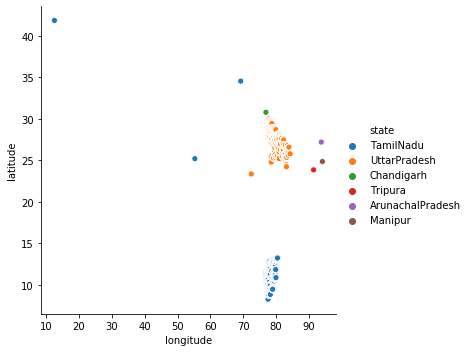

In [45]:
sns.relplot(data=geo_df, y='latitude', x='longitude', hue='state')
plt.show()

In [46]:
tn_out_data=new_event.loc[(new_event['state']=='TamilNadu') & (new_event['longitude']<75) & (new_event['latitude']>20),['longitude','latitude','city','state']].drop_duplicates()
tn_out_data

,longitude,latitude,city,state
1576980,69.2075,34.5553,Chennai,TamilNadu
1704983,55.2708,25.2048,Chennai,TamilNadu
1777732,12.5674,41.8719,Chennai,TamilNadu


In [47]:
up_out_data=new_event.loc[(new_event['state']=='UttarPradesh') & (new_event['longitude']<73) & (new_event['latitude']<25),['longitude','latitude','city','state']].drop_duplicates()
up_out_data

,longitude,latitude,city,state
2635938,72.419673,23.397143,Kadi,UttarPradesh
2666293,72.389010,23.368421,Kadi,UttarPradesh
2681346,72.425512,23.330159,Kadi,UttarPradesh
2694334,72.365270,23.375839,Kadi,UttarPradesh
2709507,72.426837,23.346063,Kadi,UttarPradesh
2722146,72.393517,23.338049,Kadi,UttarPradesh
2731752,72.367590,23.389080,Kadi,UttarPradesh
2740130,72.394669,23.327080,Kadi,UttarPradesh
2757842,72.356246,23.390456,Kadi,UttarPradesh
2762356,72.420054,23.334427,Kadi,UttarPradesh


In [48]:
geo_outlier=tn_out_data.append(up_out_data)
geo_outlier

,longitude,latitude,city,state
1576980,69.207500,34.555300,Chennai,TamilNadu
1704983,55.270800,25.204800,Chennai,TamilNadu
1777732,12.567400,41.871900,Chennai,TamilNadu
2635938,72.419673,23.397143,Kadi,UttarPradesh
2666293,72.389010,23.368421,Kadi,UttarPradesh
2681346,72.425512,23.330159,Kadi,UttarPradesh
2694334,72.365270,23.375839,Kadi,UttarPradesh
2709507,72.426837,23.346063,Kadi,UttarPradesh
2722146,72.393517,23.338049,Kadi,UttarPradesh
2731752,72.367590,23.389080,Kadi,UttarPradesh


In [49]:
locations = geo_outlier[['latitude','longitude']].drop_duplicates()
print(locations[locations['latitude'].isnull()].shape)
locationlist= locations.values.tolist()

(0, 2)


In [50]:
len(locationlist)

28

In [51]:
import folium

map1 = folium.Map(location=locationlist[27], zoom_start=5)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map1)
    
map1

Above graph clearly shows that the incorrect/outlier geo locations add no value to the analysis.  It is imperative to remove these in order to get the correct insights.

In [52]:
#Drop the rows with outlier geo code values for state - TamilNadu
new_event= new_event.drop(new_event[(new_event['state']=='TamilNadu') & (new_event['longitude']<75) &
                                      (new_event['latitude']>20)].index)

In [53]:
#Drop the rows with outlier geo code values for state - UttarPradesh
new_event=new_event.drop(new_event[(new_event['state']=='UttarPradesh') & (new_event['longitude']<73) &
                                      (new_event['latitude']<25)].index)

In [54]:
geo_df=new_event[['longitude','latitude','city','state']].drop_duplicates()

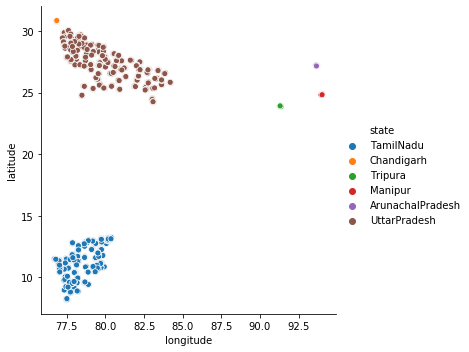

In [55]:
#Plot the filtered geo code
sns.relplot(data=geo_df, y='latitude', x='longitude', hue='state')
plt.show()

In [56]:
#Check the changes
new_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533459 entries, 1428965 to 2829977
Data columns (total 11 columns):
event_id     533459 non-null float64
device_id    533459 non-null float64
longitude    533459 non-null float64
latitude     533459 non-null float64
city         533459 non-null object
state        533459 non-null object
year         533459 non-null int64
month        533459 non-null int64
week         533459 non-null int64
day          533459 non-null int64
hour         533459 non-null int64
dtypes: float64(4), int64(5), object(2)
memory usage: 48.8+ MB


In [57]:
#Convert the type of device_id in order to merge the tables
agt['device_id'] = agt['device_id'].astype('float64')
brand['device_id'] = brand['device_id'].astype('float64')

In [58]:
combinedf = new_event.merge(agt, on = 'device_id', how='inner').merge(brand, on='device_id', how='inner')
combinedf.shape

(411599, 16)

In [59]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411599 entries, 0 to 411598
Data columns (total 16 columns):
event_id        411599 non-null float64
device_id       411599 non-null float64
longitude       411599 non-null float64
latitude        411599 non-null float64
city            411599 non-null object
state           411599 non-null object
year            411599 non-null int64
month           411599 non-null int64
week            411599 non-null int64
day             411599 non-null int64
hour            411599 non-null int64
gender          411599 non-null object
age             411599 non-null int64
group           411599 non-null object
phone_brand     411599 non-null object
device_model    411599 non-null object
dtypes: float64(4), int64(6), object(6)
memory usage: 53.4+ MB


<a id=section3></a>

<a id=section4></a>

### Visualization

<a id=section401></a>

#### 4.1. Distribution of Users(device_id) across States

In [60]:
#Filter the top ten phone_brand
toptenbrand = combinedf.groupby('phone_brand').device_id.nunique().reset_index().sort_values(['device_id'], ascending=False).head(10)
toptenbrand

,phone_brand,device_id
20,Xiaomi,1756
18,Samsung,1547
5,Huawei,1085
23,vivo,652
14,OPPO,511
12,Meizu,422
1,Coolpad,350
3,HTC,111
10,Lenovo,78
9,LeEco,65


In [61]:
#Create dataframe with unique device_id
unique_device = combinedf.drop_duplicates(subset='device_id', keep="first")
unique_device.sample()

,event_id,device_id,longitude,latitude,city,state,year,month,week,day,hour,gender,age,group,phone_brand,device_model
344402,21357.0,4.987468e+18,78.830418,28.935308,Moradabad,UttarPradesh,2016,5,17,6,19,M,28,M27-28,Xiaomi,Red rice


In [62]:
#create dataframe with the top ten phone brand for plotting
graph_df = unique_device[unique_device.phone_brand.isin(['Xiaomi','Samsung','Huawei','vivo','OPPO','Meizu','Coolpad','HTC','Lenovo','LeEco'])]
graph_df.sample()

,event_id,device_id,longitude,latitude,city,state,year,month,week,day,hour,gender,age,group,phone_brand,device_model
285056,2139.0,2.170435e+18,80.296394,13.181697,Chennai,TamilNadu,2016,5,17,6,3,F,26,F24-26,Xiaomi,Red rice2A


[Text(0, 0.5, 'User count'), Text(0.5, 0, 'State')]

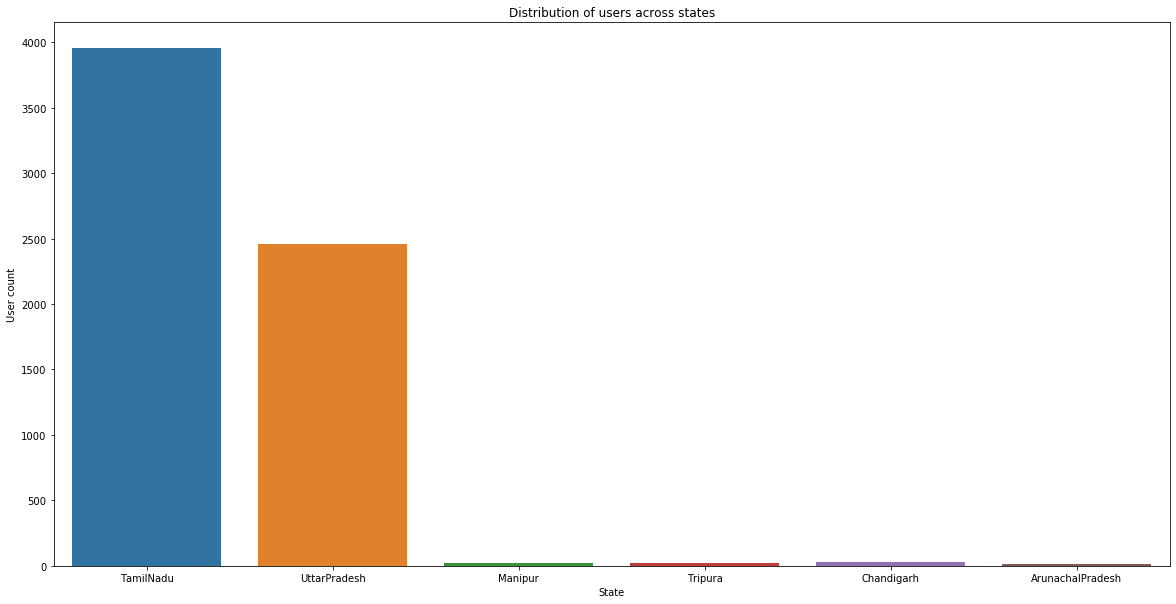

In [63]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(x='state', data=graph_df.sort_values(['device_id'],ascending=False)).set_title('Distribution of users across states')
ax.set(xlabel='State', ylabel='User count')

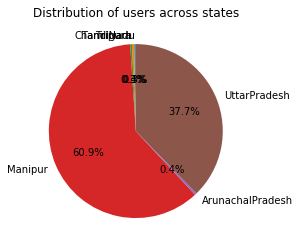

In [65]:
plt.pie(unique_device.groupby('state')['state'].count(), labels=unique_device['state'].unique(), startangle=90, autopct='%.1f%%')
plt.title('Distribution of users across states')
plt.show()

<a id=section401></a>

<a id=section402></a>

#### 2. Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands)

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Phone brand')]

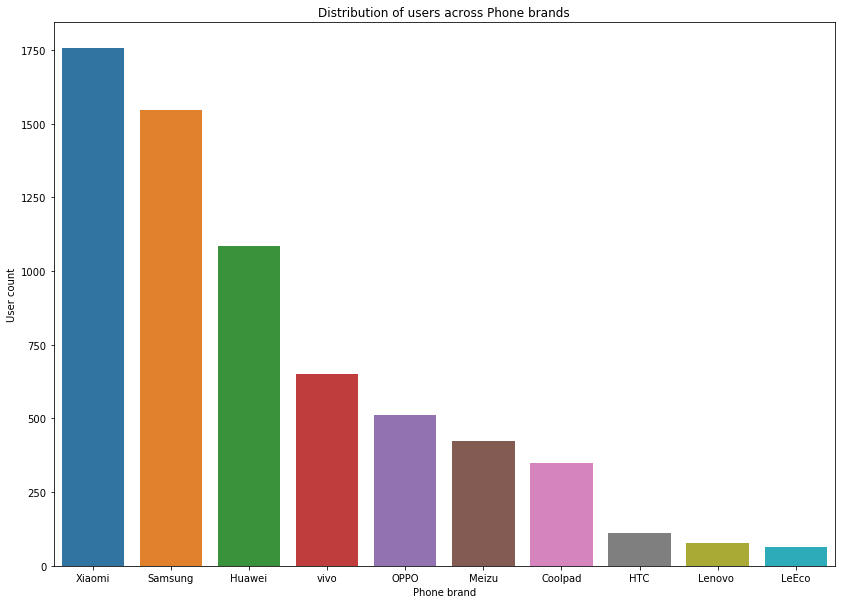

In [66]:
fig, ax = plt.subplots(figsize = (14,10))
sns.countplot(x='phone_brand', data=unique_device.sort_values(['device_id'],ascending=False), 
              order=unique_device.phone_brand.value_counts().iloc[:10].index).set_title('Distribution of users across Phone brands')
ax.set(xlabel='Phone brand', ylabel='User count')

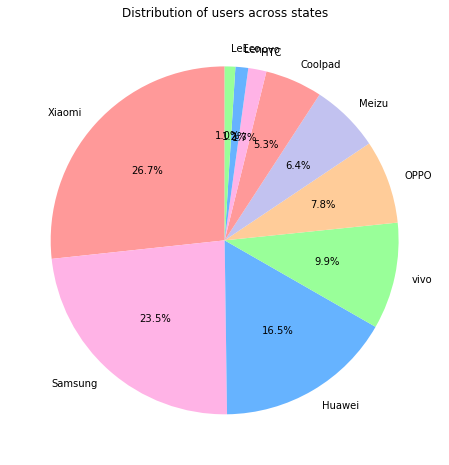

In [67]:
colors = ['#ff9999','#ffb3e6','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
fig, ax = plt.subplots(figsize = (8,8))
plt.pie(toptenbrand['device_id'], labels=toptenbrand['phone_brand'], colors=colors, startangle=90, autopct='%.1f%%')
plt.title('Distribution of users across states')
plt.show()

<a id=section402></a>

<a id=section403></a>

#### 3. Distribution of Users across Gender

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Gender')]

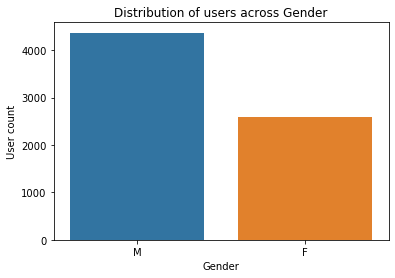

In [68]:
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(x='gender', data=unique_device).set_title('Distribution of users across Gender')
ax.set(xlabel='Gender', ylabel='User count')

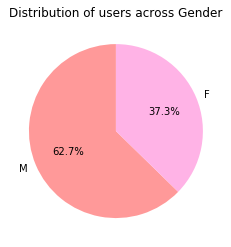

In [69]:
gen_cnt = [unique_device[unique_device.gender == 'M']['gender'].count(), unique_device[unique_device.gender == 'F']['gender'].count()]
plt.pie(gen_cnt, labels=unique_device['gender'].unique(), colors=colors, startangle=90, autopct='%.1f%%')
plt.title('Distribution of users across Gender')
plt.show()

<a id=section403></a>

<a id=section404></a>

#### 4. Distribution of Users across Age Segments.

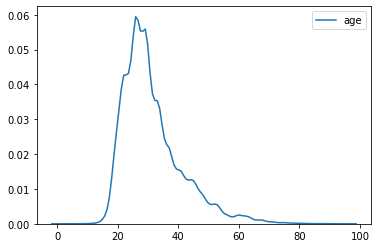

In [70]:
sns.kdeplot(agt['age'])

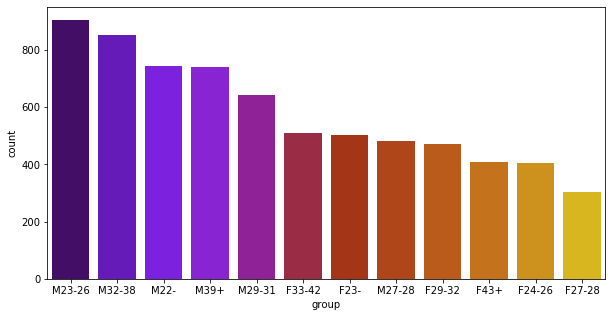

In [71]:
plt.figure(figsize=(10,5))
sns.countplot('group',data = unique_device, order = unique_device['group'].value_counts().index,palette="gnuplot")

In [72]:
unique_device['age'].value_counts()

26    417
27    403
29    389
28    381
25    352
     ... 
76      1
75      1
6       1
70      1
12      1
Name: age, Length: 70, dtype: int64

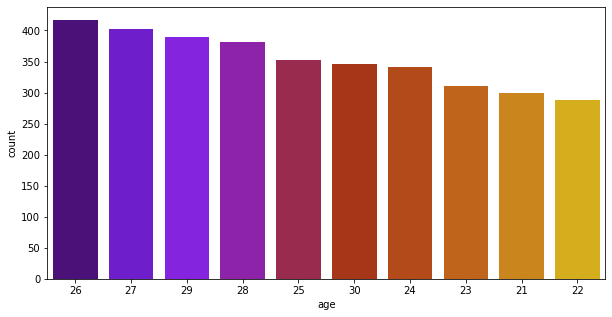

In [73]:
plt.figure(figsize=(10,5))
sns.countplot('age',data = unique_device, order = unique_device['age'].value_counts().head(10).index,palette="gnuplot")

<a id=section404></a>

<a id=section405></a>

#### 5. Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Phone brand')]

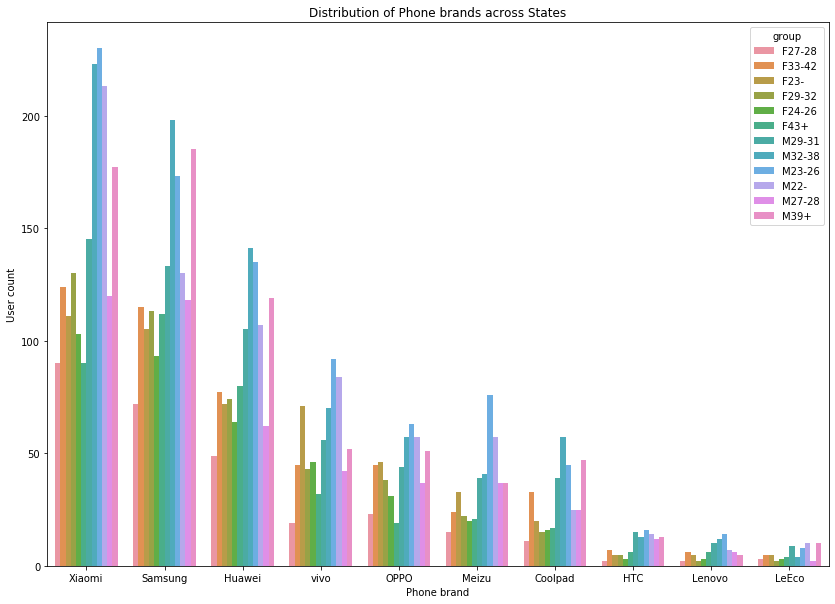

In [74]:
fig, ax = plt.subplots(figsize = (14,10))
sns.countplot(x='phone_brand', data=unique_device.sort_values(['device_id'],ascending=False), 
              order=unique_device.phone_brand.value_counts().iloc[:10].index, hue='group').set_title('Distribution of Phone brands across States')
ax.set(xlabel='Phone brand', ylabel='User count')

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Phone brand')]

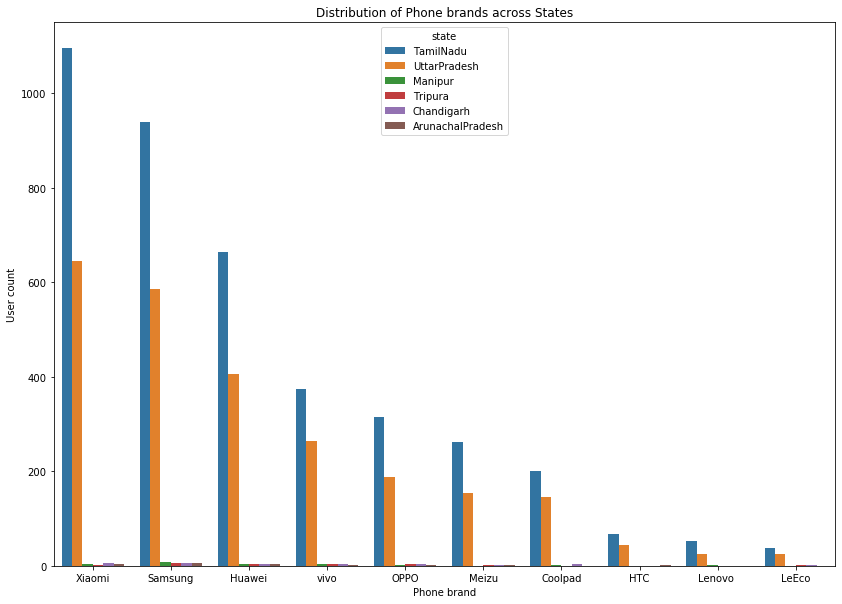

In [75]:
fig, ax = plt.subplots(figsize = (14,10))
sns.countplot(x='phone_brand', data=unique_device.sort_values(['device_id'],ascending=False), 
              order=unique_device.phone_brand.value_counts().iloc[:10].index, hue='state').set_title('Distribution of Phone brands across States')
ax.set(xlabel='Phone brand', ylabel='User count')

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Phone brand')]

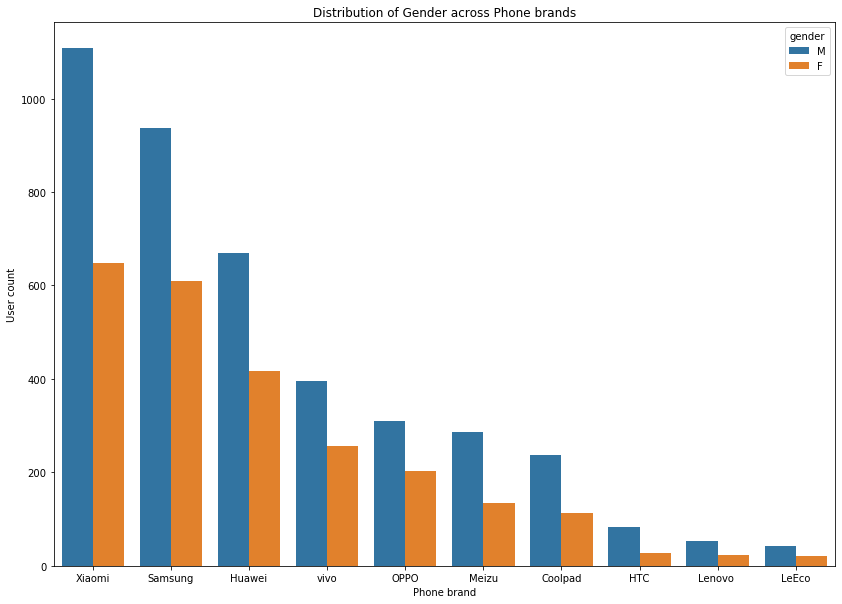

In [76]:
fig, ax = plt.subplots(figsize = (14,10))
sns.countplot(x='phone_brand', data=unique_device, order=unique_device.phone_brand.value_counts().iloc[:10].index,
              hue='gender').set_title('Distribution of Gender across Phone brands')
ax.set(xlabel='Phone brand', ylabel='User count')

<a id=section405></a>

<a id=section406></a>

#### 6. Distribuiion of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands)

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Gender')]

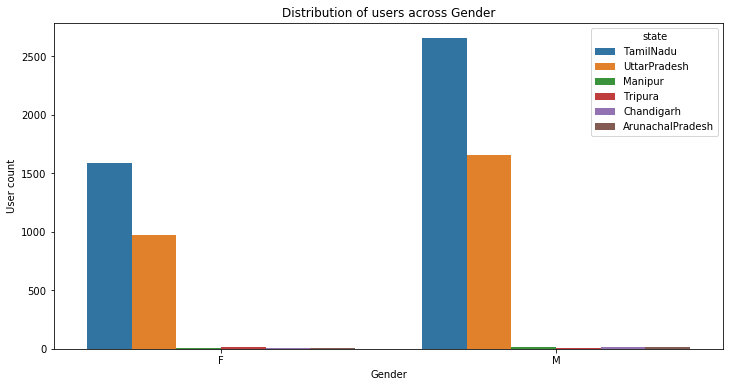

In [77]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x='gender', data=unique_device.sort_values(['device_id'],ascending=False), hue='state').set_title('Distribution of users across Gender')
ax.set(xlabel='Gender', ylabel='User count')

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Gender')]

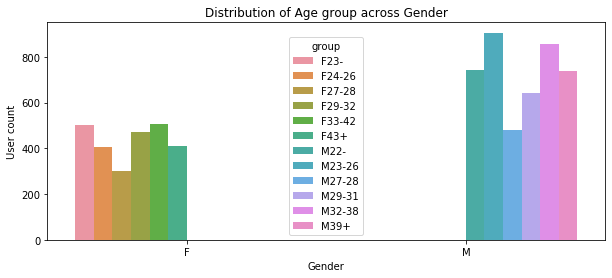

In [78]:
fig, ax = plt.subplots(figsize = (10,4))
sns.countplot(x='gender', data=unique_device.sort_values(['group'],ascending=True), hue='group').set_title('Distribution of Age group across Gender')
ax.set(xlabel='Gender', ylabel='User count')

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Gender')]

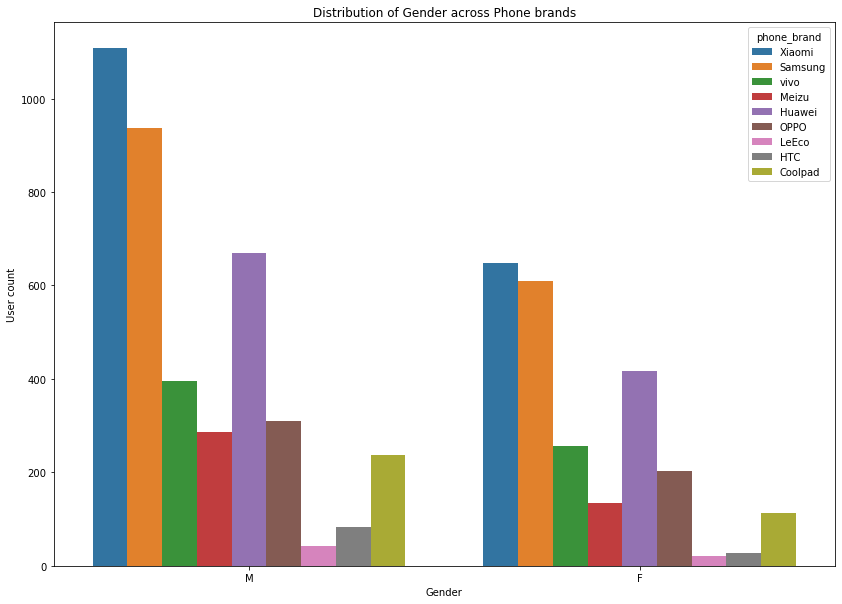

In [79]:
fig, ax = plt.subplots(figsize = (14,10))
sns.countplot(x='gender', data=graph_df, hue='phone_brand').set_title('Distribution of Gender across Phone brands')
ax.set(xlabel='Gender', ylabel='User count')

<a id=section406></a>

<a id=section407></a>

#### 7. Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands)

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Age group')]

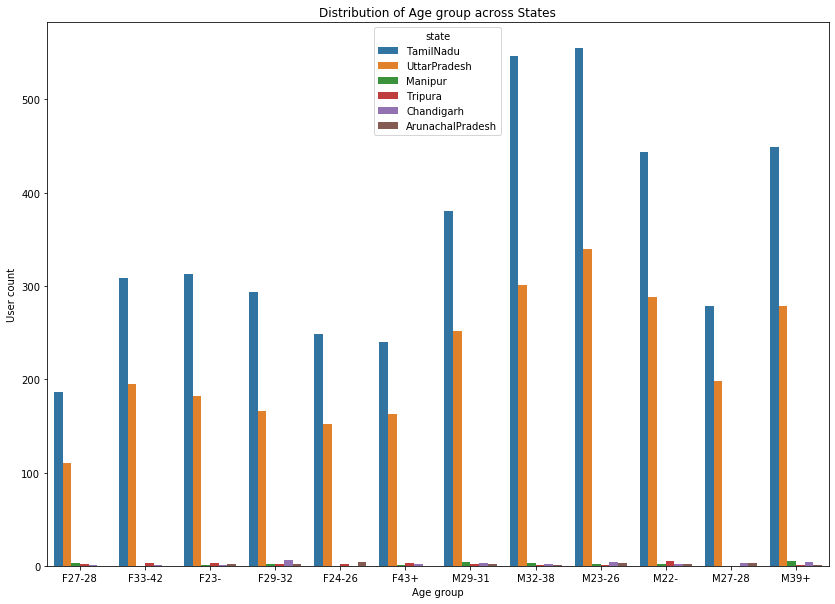

In [80]:
fig, ax = plt.subplots(figsize = (14,10))
sns.countplot(x='group', data=unique_device.sort_values(['device_id'],ascending=False), 
              hue='state').set_title('Distribution of Age group across States')
ax.set(xlabel='Age group', ylabel='User count')

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Age group')]

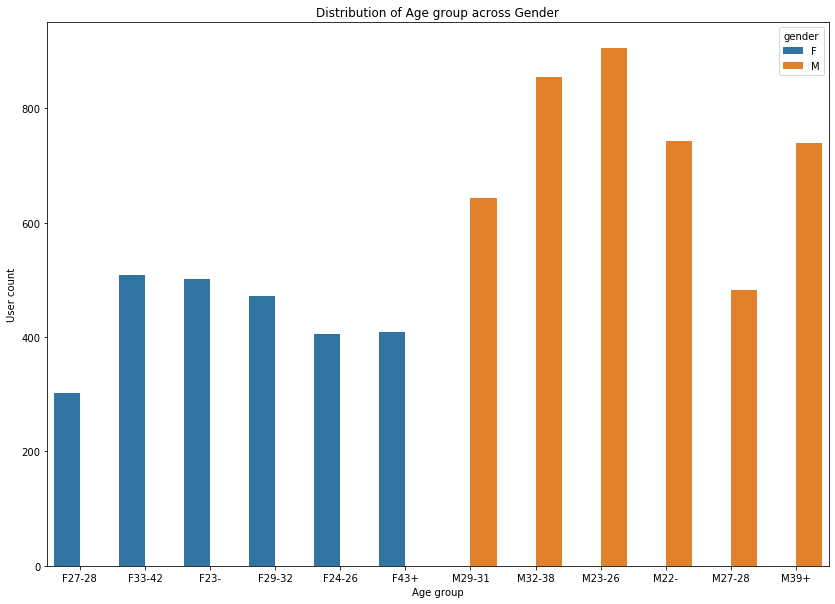

In [81]:
fig, ax = plt.subplots(figsize = (14,10))
sns.countplot(x='group', data=unique_device.sort_values(['device_id'],ascending=False), 
              hue='gender').set_title('Distribution of Age group across Gender')
ax.set(xlabel='Age group', ylabel='User count')

[Text(0, 0.5, 'User count'), Text(0.5, 0, 'Age group')]

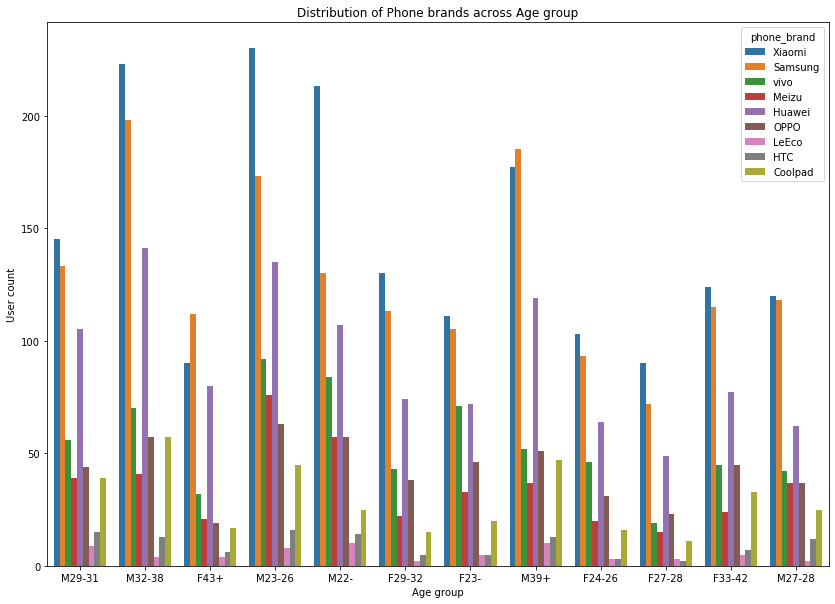

In [82]:
fig, ax = plt.subplots(figsize = (14,10))
sns.countplot(x='group', data=graph_df, hue='phone_brand').set_title('Distribution of Phone brands across Age group')
ax.set(xlabel='Age group', ylabel='User count')

<a id=section407></a>

<a id=section408></a>

#### 8. Hourly distribution of Phone Calls

[Text(0, 0.5, 'Phone call count'), Text(0.5, 0, 'Hour')]

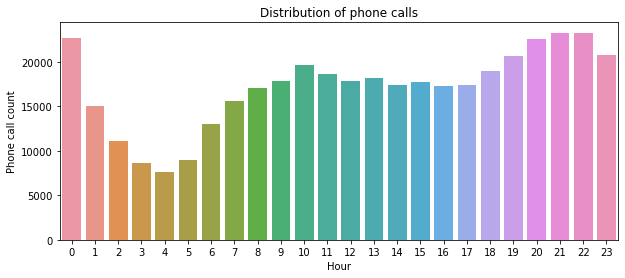

In [83]:
fig, ax = plt.subplots(figsize = (10,4))
sns.countplot(x='hour', data=combinedf).set_title('Distribution of phone calls')
ax.set(xlabel='Hour', ylabel='Phone call count')

[Text(0, 0.5, 'Phone call count'), Text(0.5, 0, 'Hour')]

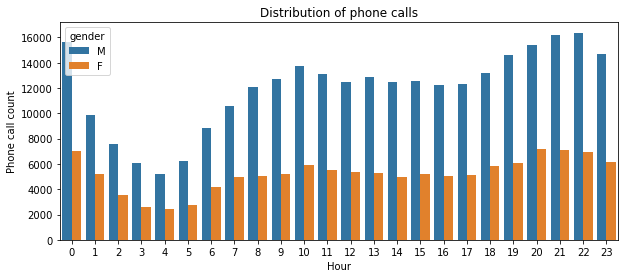

In [84]:
fig, ax = plt.subplots(figsize = (10,4))
sns.countplot(x='hour', data=combinedf,hue='gender').set_title('Distribution of phone calls')
ax.set(xlabel='Hour', ylabel='Phone call count')

[Text(0, 0.5, 'Phone call count'), Text(0.5, 0, 'Hour')]

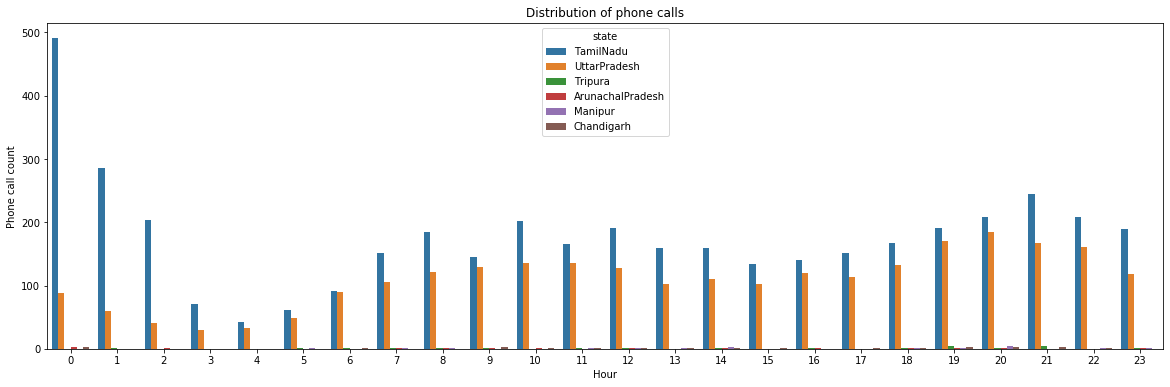

In [85]:
fig, ax = plt.subplots(figsize = (20,6))
sns.countplot(x='hour', data=unique_device.sort_values(['device_id']), hue='state').set_title('Distribution of phone calls')
ax.set(xlabel='Hour', ylabel='Phone call count')

[Text(0, 0.5, 'Phone call count'), Text(0.5, 0, 'Hour')]

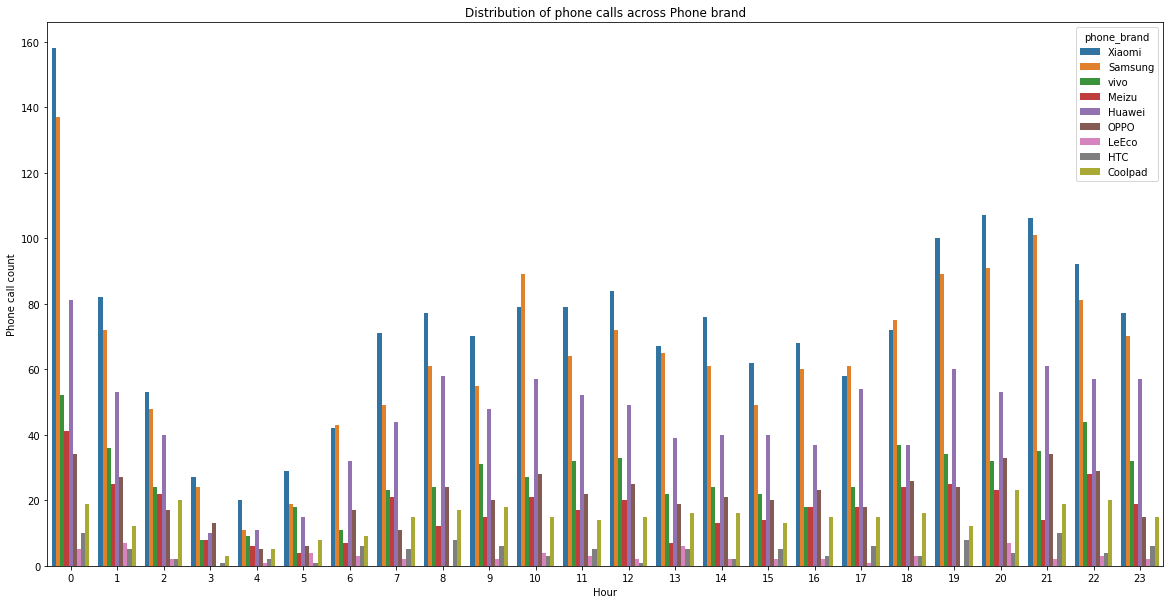

In [86]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(x='hour', data=graph_df, hue='phone_brand').set_title('Distribution of phone calls across Phone brand')
ax.set(xlabel='Hour', ylabel='Phone call count')

<a id=section408></a>

<a id=section409></a>

#### 9. Plot the Users on the Map using any suitable package

In [87]:
geo_df1 = unique_device
geo_df1 = geo_df.groupby(["longitude", "latitude","city","state"]).size().reset_index(name="count")
geo_df1.sort_values('count', ascending = False)

,longitude,latitude,city,state,count
0,76.700984,11.497595,Udagamandalam,TamilNadu,1
6353,80.320104,13.181201,Chennai,TamilNadu,1
6355,80.320169,13.135264,Chennai,TamilNadu,1
6356,80.320178,13.105548,Chennai,TamilNadu,1
6357,80.320206,13.114408,Chennai,TamilNadu,1
...,...,...,...,...,...
3179,78.847962,28.861941,Moradabad,UttarPradesh,1
3180,78.849183,28.506012,Chandausi,UttarPradesh,1
3181,78.849289,28.888424,Moradabad,UttarPradesh,1
3182,78.850376,28.558641,Chandausi,UttarPradesh,1


In [88]:
from folium.plugins import HeatMap
base_map = folium.Map(location=[20.5937,78.9629], control_scale=True, zoom_start=5)
HeatMap(data=geo_df1[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map

<a id=section409></a>

<a id=section4></a>